In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import networkx as nx

## Read file

In [24]:
sFlowData = pd.read_csv('Data_2.csv', names=['Type','sflow_agent_address',
'inputPort','outputPort','src_MAC','dst_MAC','ethernet_type','in_vlan','out_vlan',
'src_IP','dest_IP','IP_protocol','ip_tos','ip_ttl','src_port','dest_port',
'tcp_flags','packet_size','IP_size','sampling_rate'])

dataType = "Type"
srcIP = "src_IP"
destIP = "dest_IP"
ipProtocol = "IP_protocol"
destPort = "dest_port"
ipSize = "IP_size"



# first column can be "FLOW" or "CNTR"
# we want to look at entries with Type == "FLOW", thus, we extract those columns.
sFlowData = sFlowData[sFlowData.Type == 'FLOW']

sFlowData.head()


Type sflow_agent_address  inputPort  outputPort       src_MAC  \
0  FLOW       203.30.38.251        193         130  0031466b23cf   
1  FLOW       203.30.38.251        193         130  0031466b23cf   
2  FLOW       203.30.38.251        199         131  544b8cf9a7df   
3  FLOW       203.30.38.251        193         131  0031466b23cf   
4  FLOW       203.30.38.251        129         193  00135f21bc80   

        dst_MAC ethernet_type  in_vlan  out_vlan          src_IP  \
0  00239cd087c1        0x0800    919.0       919    74.125.10.59   
1  00239cd087c1        0x0800    919.0       919  173.194.22.215   
2  001cb0c88e40        0x0800    600.0        43    193.62.193.9   
3  001cb0c88e40        0x0800    919.0        43  74.125.130.132   
4  0031466b23cf        0x0800     11.0       919   155.69.160.69   

          dest_IP  IP_protocol ip_tos  ip_ttl  src_port  dest_port tcp_flags  \
0  137.132.38.238           17   0x00      63     443.0      62758      0x00   
1  137.132.228.29            6   0x00      63     443.0      39740      0x10   
2  202.130.56.153            6   0x00     246      80.0      35794      0x18   
3  192.122.131.33            6   0x00      52     443.0       5287      0x10   
4   74.125.68.139           17   0x60      59   48361.0        443      0x00   

   packet_size  IP_size  sampling_rate  
0         1396     1378           2048  
1         1438     1420           2048  
2          272      250           2048  
3         1418     1400           2048  
4           89       67           2048

In [25]:
sFlowData["Type"].value_counts()

FLOW    176017
Name: Type, dtype: int64

## TOP 5 TALKERS

Top 5 Talkers: 

IP address          # of packets
13.107.4.50         5960      
130.14.250.7        4034      
155.69.160.38       3866      
171.67.77.19        2656      
155.69.199.255      2587      


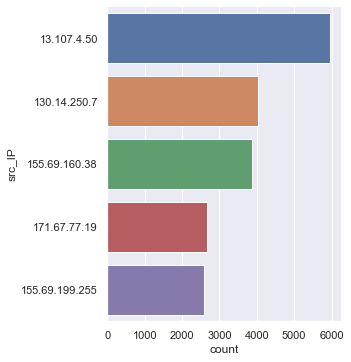

In [77]:
top5talkers = sFlowData[srcIP].value_counts()[:5]

print('Top 5 Talkers: \n')

print("{:<20}{:<10}".format("IP address", "# of packets"))
for talker in top5talkers.keys():
    print("{:<20}{:<10}".format(talker, top5talkers[talker]))
sb.catplot(y = srcIP, data = sFlowData, kind = "count", order=sFlowData.src_IP.value_counts().iloc[:5].index)


## TOP 5 LISTENERS

Top 5 listeners: 

IP address          # of packets
137.132.228.33      5908      
192.122.131.36      4662      
202.51.247.133      4288      
137.132.228.29      4022      
103.37.198.100      3741      


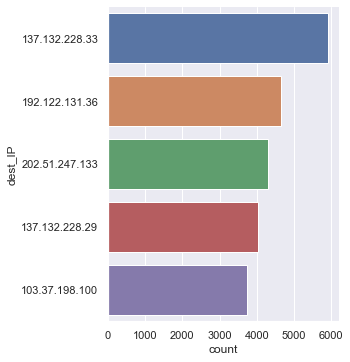

In [78]:
top5listeners = sFlowData[destIP].value_counts()[:5]

print('Top 5 listeners: \n')

print("{:<20}{:<10}".format("IP address", "# of packets"))
for listener in top5listeners.keys():
    print("{:<20}{:<10}".format(listener, top5listeners[listener]))
sb.catplot(y = destIP, data = sFlowData, kind = "count", order=sFlowData.dest_IP.value_counts().iloc[:5].index)


## EXERCISE 4B: TRANSPORT PROTOCOL

In [46]:
transportProtocol = sFlowData[ipProtocol].value_counts()[:5]

# Display the top 5 Transport Protocol
print('Top 5 Most Used Transport Layer Protocols: \n')
print("{:<20}{:<10}".format("Header Value", "# of packets"))

for protocol in transportProtocol.keys():
    print("{:<20}{:<10}".format(protocol, transportProtocol[protocol]))

Top 5 Most Used Transport Layer Protocols: 

Header Value        # of packets
6                   137707    
17                  36852     
50                  718       
47                  664       
1                   60        


In [26]:
sFlowData[ipProtocol].value_counts()

6     137707
17     36852
50       718
47       664
1         60
58        10
41         3
2          2
0          1
Name: IP_protocol, dtype: int64

In [41]:
others = []
for item in sFlowData[ipProtocol].value_counts().iteritems():
    if item[0]!=6 and item[0]!=17:
        others.append(item[0])
for value in others:
    print(value,"/", end = " ")

50 / 47 / 1 / 58 / 41 / 2 / 0 / 

In [47]:
header6 = sFlowData[ipProtocol].value_counts().get(6)
print(int(header6))
header17 = sFlowData[ipProtocol].value_counts().get(17)
print(int(header17))

total = sFlowData[ipProtocol].count()
print(int(total))
print("Others: ", (total - header6 - header17))


print('\n % of TCP and UDP: \n')
print('TCP: {:.2f}%'.format((header6/total)*100))
print('UDP: {:.2f}%'.format((header17/total)*100))
print('Others: {:.2f}%'.format(((total - header6 - header17)/total)*100))

137707
36852
176017
Others:  1458

 % of TCP and UDP: 

TCP: 78.24%
UDP: 20.94%
Others: 0.83%


## EXERCISE 4C: APPLICATIONS PROTOCOL 

In [53]:
top5apps = sFlowData[destPort].value_counts()[:5]

print('Top 5 most frequently used application protocols: \n')

print("{:<30}{:<10}".format("Destination IP port number ", "# of packets"))
for app in top5apps.keys():
    print("{:<30}{:<10}".format(app, top5apps[app]))


Top 5 most frequently used application protocols: 

Destination IP port number    # of packets
443                           43208     
80                            11018     
50930                         2450      
15000                         2103      
8160                          1354      


## EXERCISE 4D: TRAFFIC INTENSITY

In [62]:
print("Total calculated sampled traffic (MB): ", sFlowData[ipSize].sum()/1000000)

print("Estimated Total Traffic taking into account the sampling rate (MB) : ", (sFlowData[ipSize].sum()/1000000)*2048)
print("Estimated Total Traffic taking into account the sampling rate (MB) : ", 169.93*2048)


Total calculated sampled traffic (MB):  169.93475
Estimated Total Traffic taking into account the sampling rate (MB) :  348026.368
Estimated Total Traffic taking into account the sampling rate (MB) :  348016.64


## EXERCISE 4E: ADDITIONAL ANALYSIS

Top 5 communication pairs (unidirectional):

In [6]:
print(
    sFlowData
        .groupby(['src_IP', 'dest_IP'])
        .size()
        .sort_values(ascending=False)
        .nlargest(5)
)

src_IP          dest_IP       
130.14.250.7    103.37.198.100    3739
171.67.77.19    192.122.131.36    2656
129.99.230.54   137.132.22.74     2097
137.132.228.42  137.131.17.212    1553
155.69.252.133  138.75.242.36     1475
dtype: int64


Top 5 communication pairs (bidirectional):

In [5]:
data_new = sFlowData[(sFlowData["src_IP"] != "") & (sFlowData["dest_IP"] != "")].groupby(["src_IP", "dest_IP"]).size()
IP_pairs = {}

for i in data_new.iteritems():    
    if (i[0][0],i[0][1]) in IP_pairs:
        IP_pairs[i[0][0],i[0][1]] += i[1]
    elif (i[0][1],i[0][0]) in IP_pairs:
        IP_pairs[i[0][1],i[0][0]] += i[1]
    else:
        IP_pairs[i[0][0],i[0][1]] = i[1]
        
data_sorted = sorted(IP_pairs.items(), key=lambda k: k[1], reverse = True)[0:5]

data_4E=pd.DataFrame(data_sorted)
data_4E.columns = ["(IP Address 1, IP Address 2)","No. Of Packets"]
data_4E

(IP Address 1, IP Address 2)  No. Of Packets
0    (103.37.198.100, 130.14.250.7)            4201
1    (171.67.77.19, 192.122.131.36)            3628
2    (129.99.230.54, 137.132.22.74)            2417
3  (137.131.17.212, 137.132.228.42)            2370
4  (104.146.199.27, 202.21.159.246)            1794

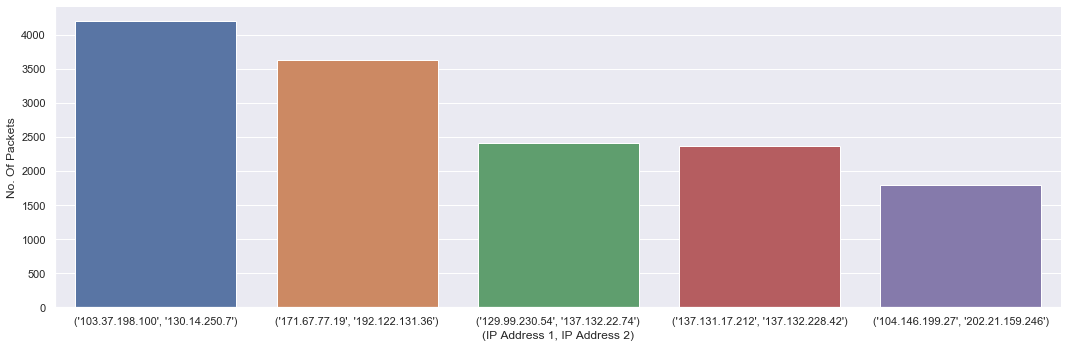

In [20]:
col = "(IP Address 1, IP Address 2)"
sb.catplot(x = col, data = data_4E, y = "No. Of Packets", kind = 'bar', aspect=3)


### Visualizing the communication between different IP hosts:

Visualizing communication of top 5 talkers:


src_ip: 13.107.4.50


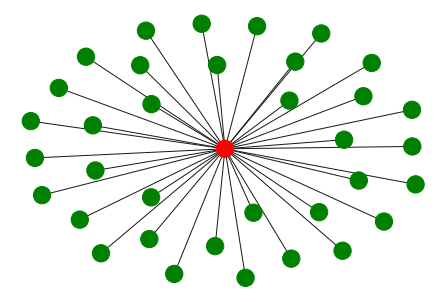

src_ip: 130.14.250.7


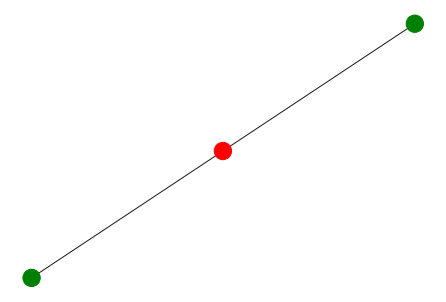

src_ip: 155.69.160.38


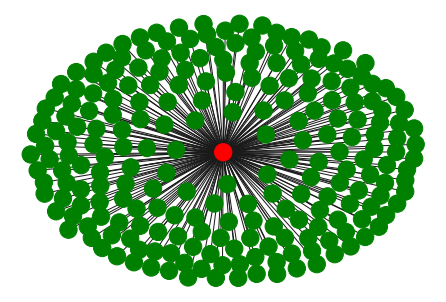

src_ip: 171.67.77.19


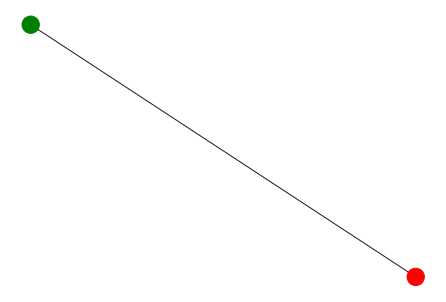

src_ip: 155.69.199.255


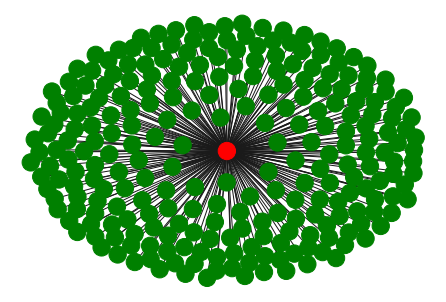

In [84]:
for talker in top5talkers.keys():
    colors = []
    df_network = sFlowData.loc[sFlowData['src_IP'] == talker]
    df_network = df_network[['src_IP', 'dest_IP']]
    print("src_ip:", talker)

    network_graph = nx.Graph()
    network_graph = nx.from_pandas_edgelist(df_network, 'src_IP', 'dest_IP')
    
    for node in network_graph:
        if node in talker:          #source
            colors.append('red') 
        else:                       #destination
            colors.append('green')
    
    nx.draw(network_graph, with_labels=False, node_color=colors)
    plt.show()

Visualizing communication of top 5 listeners:


dest_ip: 137.132.228.33


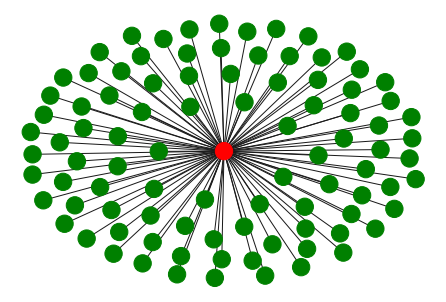

dest_ip: 192.122.131.36


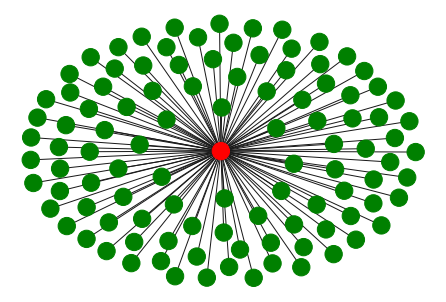

dest_ip: 202.51.247.133


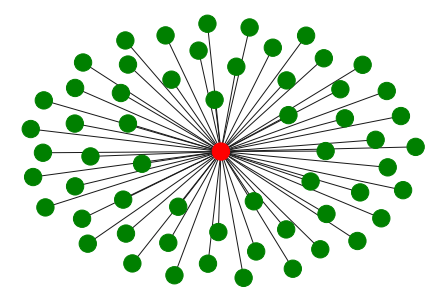

dest_ip: 137.132.228.29


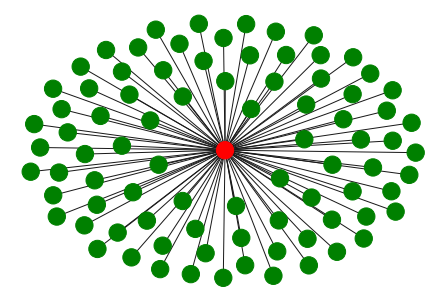

dest_ip: 103.37.198.100


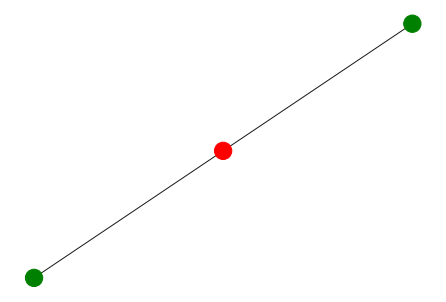

In [85]:
for listener in top5listeners.keys():
    colors = []

    df_network = sFlowData.loc[sFlowData[destIP] == listener]
    df_network = df_network[['src_IP', 'dest_IP']]
    print("dest_ip:", listener)

    network_graph = nx.Graph()
    network_graph = nx.from_pandas_edgelist(df_network, 'src_IP', 'dest_IP')
    
    for node in network_graph:
        if node in listener:          #source
            colors.append('red') 
        else:                       #destination
            colors.append('green')
    
    nx.draw(network_graph, with_labels=False, node_color=colors)
    plt.show()


In [35]:
import ipinfo
access_token = ''
handler = ipinfo.getHandler(access_token)

In [5]:
sFlowData['src_Country']=""
sFlowData['dest_Country']=""

In [32]:
sFlowData.to_csv("sFlow_country.csv", index=False)

In [22]:
ipToCountry = {'74.125.10.59': 'SG', '137.132.38.238': 'SG', '173.194.22.215': 'SG', '137.132.228.29': 'SG', '193.62.193.9': 'GB', '202.130.56.153': 'SG', '74.125.130.132': 'SG', '192.122.131.33': 'SG', '155.69.160.69': 'SG', '74.125.68.139': 'SG', '54.230.159.64': 'RO', '155.69.191.254': 'SG', '155.69.253.4': 'SG', '74.125.10.39': 'SG', '155.69.160.73': 'SG', '64.233.188.128': 'CN', '129.99.230.54': 'US', '137.132.22.74': 'SG', '210.32.0.65': 'CN', '155.69.16.255': 'SG', '209.85.229.236': 'SG', '220.156.183.2': 'SG', '209.85.229.235': 'SG', '202.51.247.133': 'SG', '54.192.159.42': 'US', '155.69.203.215': 'SG', '74.125.10.7': 'SG', '155.69.253.6': 'SG', '74.125.130.100': 'SG', '155.69.96.30': 'SG', '137.132.204.235': 'SG', '212.219.56.184': 'GB', '203.80.20.66': 'MY', '198.124.238.162': 'NL', '209.85.229.152': 'SG', '137.132.228.33': 'SG', '207.241.227.113': 'US', '192.248.32.221': 'LK', '202.21.158.14': 'SG', '13.107.4.50': 'US', '123.136.64.7': 'SG', '66.96.215.33': 'SG', '203.127.44.13': 'SG', '202.6.242.63': 'SG', '31.13.73.14': 'IE', '123.136.68.2': 'SG', '31.13.78.52': 'US', '123.136.64.29': 'SG', '192.229.145.59': 'US', '74.125.10.8': 'SG', '137.132.76.173': 'SG', '209.85.229.231': 'SG', '210.48.222.9': 'MY', '192.122.131.36': 'SG', '171.67.77.19': 'US', '155.69.160.76': 'SG', '219.93.37.99': 'MY', '155.69.124.186': 'SG', '74.125.68.94': 'SG', '209.85.229.151': 'SG', '137.132.22.253': 'SG', '209.85.229.250': 'SG', '202.51.247.132': 'SG', '173.194.22.202': 'SG', '74.125.10.44': 'SG', '137.132.228.37': 'SG', '202.45.132.220': 'MY', '158.109.8.13': 'ES', '173.194.22.216': 'SG', '137.132.228.42': 'SG', '137.132.195.175': 'SG', '137.132.232.42': 'SG', '153.125.224.48': 'JP', '202.6.241.107': 'SG', '103.227.89.2': 'SG', '202.21.158.254': 'SG', '202.6.241.93': 'SG', '216.58.203.234': 'IN', '54.192.156.126': 'IT', '155.69.42.169': 'SG', '13.107.18.11': 'US', '40.96.47.34': 'US', '123.136.64.30': 'SG', '155.69.253.5': 'SG', '74.125.10.56': 'SG', '155.69.199.255': 'SG', '74.125.68.211': 'SG', '74.125.23.127': 'US', '130.14.29.110': 'US', '103.18.0.17': 'MY', '209.85.229.154': 'SG', '137.132.196.216': 'SG', '40.100.16.2': 'MY', '192.122.131.126': 'SG', '155.69.160.38': 'SG', '74.125.68.132': 'SG', '155.69.191.255': 'SG', '74.125.203.128': 'US', '74.125.10.42': 'SG', '207.241.227.115': 'US', '103.18.93.227': 'MY', '220.156.176.195': 'SG', '198.11.132.221': 'US', '124.155.223.104': 'SG', '117.121.249.253': 'SG', '198.71.44.193': 'US', '128.135.243.249': 'US', '103.38.154.7': 'JP', '202.21.159.244': 'SG', '104.44.201.147': 'US', '137.132.222.134': 'SG', '137.132.22.189': 'SG', '74.125.68.100': 'SG', '155.69.254.76': 'SG', '128.220.160.159': 'US', '155.69.160.32': 'SG', '54.169.194.143': 'SG', '54.192.159.248': 'US', '207.241.230.50': 'US', '155.69.107.149': 'SG', '130.14.250.7': 'US', '103.37.198.100': 'SG', '74.125.10.11': 'SG', '137.132.183.253': 'SG', '155.69.3.8': 'SG', '203.119.25.1': 'CN', '40.100.16.18': 'MY', '155.69.204.104': 'SG', '216.58.221.78': 'IN', '155.69.160.78': 'SG', '210.186.245.69': 'MY', '106.10.166.54': 'SG', '155.69.97.14': 'SG', '157.240.7.26': 'US', '123.136.64.31': 'SG', '13.78.93.8': 'JP', '209.85.229.249': 'SG', '136.172.50.67': 'DE', '155.69.16.174': 'SG', '140.90.101.61': 'US', '137.132.182.1': 'SG', '210.48.222.13': 'MY', '209.85.229.201': 'SG', '137.132.209.149': 'SG', '150.65.7.130': 'JP', '203.80.16.229': 'MY', '74.125.10.40': 'SG', '137.132.228.34': 'SG', '74.125.10.58': 'SG', '137.132.36.66': 'SG', '198.129.254.34': 'US', '123.136.64.58': 'SG', '192.170.233.203': 'US', '202.6.241.101': 'SG', '155.69.213.32': 'SG', '74.125.130.95': 'SG', '155.69.253.69': 'SG', '203.106.85.169': 'MY', '155.69.18.221': 'SG', '74.125.10.57': 'SG', '209.85.229.204': 'SG', '130.14.250.11': 'US', '103.18.0.18': 'MY', '202.58.85.78': 'MY', '209.85.229.247': 'SG', '155.69.192.106': 'SG', '203.205.152.16': 'MY', '54.230.159.28': 'RO', '103.15.235.10': 'SG', '123.136.64.32': 'SG', '119.75.205.205': 'SG', '209.85.229.234': 'SG', '209.85.229.200': 'SG', '103.31.34.2': 'MY', '129.107.118.39': 'US', '74.125.10.10': 'SG', '216.58.221.74': 'IN', '104.66.10.65': 'MY', '155.69.206.255': 'SG', '74.125.130.139': 'SG', '155.69.137.118': 'SG', '172.217.24.98': 'HK', '40.115.52.49': 'NL', '192.248.104.27': 'LK', '209.85.229.232': 'SG', '202.58.86.24': 'MY', '74.125.130.109': 'SG', '155.69.204.71': 'SG', '74.125.68.188': 'SG', '155.69.152.201': 'SG', '74.125.130.113': 'SG', '119.161.11.11': 'SG', '202.21.159.246': 'SG', '173.252.123.160': 'US', '103.237.142.249': 'SG', '74.125.68.125': 'SG', '31.13.78.14': 'US', '123.136.64.35': 'SG', '104.116.48.202': 'IN', '124.155.223.119': 'SG', '220.156.176.35': 'SG', '137.132.222.243': 'SG', '18.84.7.159': 'US', '137.132.22.252': 'SG', '74.125.10.27': 'SG', '137.132.222.1': 'SG', '202.90.159.172': 'PH', '155.69.53.88': 'SG', '104.66.13.139': 'MY', '40.100.54.194': 'HK', '74.125.130.106': 'SG', '209.85.229.251': 'SG', '74.125.10.26': 'SG', '52.76.138.94': 'SG', '155.69.239.150': 'SG', '137.132.200.67': 'SG', '54.231.228.1': 'US', '155.69.18.232': 'SG', '163.180.145.62': 'KR', '122.129.122.187': 'MY', '198.129.254.142': 'US', '192.170.233.204': 'US', '137.132.196.130': 'SG', '173.194.22.217': 'SG', '106.10.184.48': 'SG', '106.10.200.161': 'SG', '123.136.64.33': 'SG', '103.243.221.51': 'SG', '209.85.229.219': 'SG', '74.125.10.43': 'SG', '137.132.187.24': 'SG', '137.132.77.104': 'SG', '58.26.1.114': 'MY', '219.93.37.72': 'MY', '52.219.68.85': 'JP', '155.69.203.129': 'SG', '104.66.29.6': 'MY', '137.132.142.208': 'SG', '209.85.229.203': 'SG', '220.156.176.107': 'SG', '54.255.162.180': 'SG', '58.26.1.137': 'MY', '155.69.219.58': 'SG', '74.125.68.102': 'SG', '74.125.68.93': 'SG', '103.53.34.10': 'MY', '198.202.88.146': 'US', '122.129.120.194': 'MY', '198.71.44.58': 'US', '192.86.100.221': 'US', '104.24.24.104': 'US', '117.121.250.203': 'SG', '52.198.141.145': 'JP', '155.69.214.146': 'SG', '74.125.68.189': 'SG', '52.197.51.100': 'JP', '220.156.177.253': 'SG', '173.194.22.200': 'SG', '137.132.196.4': 'SG', '192.122.131.105': 'SG', '192.248.8.114': 'LK', '137.132.183.245': 'SG', '209.85.229.220': 'SG', '173.194.22.219': 'SG', '137.132.205.140': 'SG', '111.221.29.254': 'HK', '13.69.159.30': 'IE', '157.240.7.21': 'US', '14.139.160.68': 'IN', '155.69.161.10': 'SG', '118.214.91.209': 'MY', '155.69.160.33': 'SG', '104.66.20.77': 'MY', '192.122.131.42': 'SG', '74.125.10.23': 'SG', '202.58.86.19': 'MY', '137.132.196.63': 'SG', '155.69.147.58': 'SG', '216.165.22.6': 'US', '155.69.160.70': 'SG', '155.69.107.129': 'SG', '216.58.221.67': 'IN', '209.85.229.202': 'SG', '207.241.227.126': 'US', '173.194.22.204': 'SG', '64.233.189.128': 'CN', '74.125.130.102': 'SG', '50.7.99.36': 'US', '202.6.241.90': 'SG', '132.245.254.98': 'SG', '192.122.131.131': 'SG', '54.192.150.49': 'SG', '74.125.130.156': 'SG', '54.169.118.21': 'SG', '155.69.191.249': 'SG', '54.192.156.195': 'IT', '58.26.1.105': 'MY', '74.125.68.113': 'SG', '137.132.197.62': 'SG', '137.132.72.220': 'SG', '23.220.203.16': 'SG', '202.21.158.229': 'SG', '118.189.200.61': 'SG', '204.79.197.213': 'US', '40.100.20.2': 'KR', '202.83.250.73': 'SG', '155.69.96.20': 'SG', '172.217.24.69': 'HK', '74.125.130.94': 'SG', '220.156.176.38': 'SG', '209.85.229.156': 'SG', '47.91.161.180': 'HK', '137.132.228.36': 'SG', '193.62.194.179': 'GB', '155.69.194.126': 'SG', '52.76.79.182': 'SG', '209.85.229.233': 'SG', '74.125.10.28': 'SG', '137.132.185.27': 'SG', '123.136.68.200': 'SG', '59.46.216.248': 'CN', '134.170.107.72': 'US', '155.69.214.119': 'SG', '54.230.159.164': 'RO', '74.125.68.121': 'SG', '192.248.10.11': 'LK', '129.31.93.4': 'GB', '13.107.6.168': 'US', '209.85.229.215': 'SG', '74.125.10.41': 'SG', '54.230.159.178': 'RO', '74.125.68.155': 'SG', '54.230.157.239': 'RO', '155.69.160.103': 'SG', '207.151.35.4': 'US', '155.69.145.169': 'SG', '74.125.10.12': 'SG', '155.69.96.18': 'SG', '209.85.229.217': 'SG', '210.128.235.4': 'JP', '81.74.229.141': 'IT', '31.13.95.34': 'SG', '104.116.24.167': 'US', '155.69.131.225': 'SG', '104.66.3.203': 'MY', '192.248.9.136': 'LK', '137.132.206.53': 'SG', '52.76.144.103': 'SG', '192.122.131.13': 'SG', '137.132.192.2': 'SG', '173.194.22.203': 'SG', '137.132.192.209': 'SG', '207.241.228.157': 'US', '161.139.102.8': 'MY', '192.248.24.51': 'LK', '142.157.202.186': 'CA', '155.69.254.190': 'SG', '133.50.160.70': 'JP', '155.69.137.96': 'SG', '209.85.229.155': 'SG', '137.132.241.78': 'SG', '157.55.109.224': 'US', '155.69.160.77': 'SG', '74.125.68.91': 'SG', '192.122.140.15': 'SG', '40.96.17.85': 'KR', '209.85.229.153': 'SG', '52.193.98.170': 'JP', '74.125.68.18': 'SG', '54.169.126.80': 'SG', '137.132.205.90': 'SG', '155.69.120.116': 'SG', '14.139.196.60': 'IN', '202.13.203.129': 'JP', '192.122.131.101': 'SG', '207.241.227.116': 'US', '192.248.16.125': 'LK', '137.132.206.31': 'SG', '192.122.131.54': 'SG', '65.55.252.202': 'US', '155.69.25.22': 'SG', '140.110.219.81': 'TW', '23.201.158.68': 'MY', '74.125.130.138': 'SG', '123.136.71.94': 'SG', '165.21.100.88': 'SG', '173.194.22.201': 'SG', '192.122.131.106': 'SG', '137.132.224.34': 'SG', '104.66.13.243': 'MY', '137.131.17.212': 'US', '137.132.205.98': 'SG', '1.9.21.100': 'MY', '128.91.15.204': 'US', '103.198.52.6': 'MY', '202.21.159.241': 'SG', '23.100.112.64': 'SG', '23.50.91.178': 'SG', '103.10.124.19': 'SG', '202.21.158.12': 'SG', '209.85.229.199': 'SG', '74.125.10.24': 'SG', '74.125.68.154': 'SG', '155.69.3.161': 'SG', '74.125.68.136': 'SG', '54.255.178.85': 'SG', '74.125.10.9': 'SG', '137.132.79.151': 'SG', '150.214.40.78': 'ES', '155.69.55.112': 'SG', '155.69.96.31': 'SG', '78.46.141.155': 'DE', '220.156.176.228': 'SG', '128.208.164.94': 'US', '54.192.148.163': 'SG', '220.156.176.28': 'SG', '152.78.129.104': 'GB', '155.69.253.68': 'SG', '203.106.85.50': 'MY', '155.69.128.124': 'SG', '65.52.108.90': 'US', '202.58.86.17': 'MY', '155.69.96.17': 'SG', '172.217.24.78': 'US', '157.55.109.226': 'US', '202.6.241.94': 'SG', '137.132.198.229': 'SG', '52.77.32.77': 'SG', '155.69.252.198': 'SG', '118.189.176.130': 'SG', '155.69.200.127': 'SG', '58.26.1.131': 'MY', '192.248.56.6': 'LK', '209.85.229.218': 'US', '74.125.10.60': 'SG', '131.253.61.84': 'US', '192.248.106.73': 'LK', '192.122.131.97': 'SG', '192.122.131.14': 'SG', '155.69.97.99': 'SG', '175.156.31.44': 'SG', '203.106.85.58': 'MY', '52.77.134.223': 'SG', '137.132.133.204': 'SG', '17.252.233.246': 'US', '202.6.241.92': 'SG', '23.246.54.139': 'SG', '202.6.241.108': 'SG', '171.67.37.91': 'US', '137.132.193.51': 'SG', '74.125.102.39': 'JP', '137.132.46.51': 'SG', '128.46.19.160': 'US', '122.129.127.242': 'MY', '31.13.78.35': 'US', '202.6.241.97': 'SG', '52.76.121.255': 'SG', '74.125.10.55': 'SG', '220.156.176.134': 'SG', '169.154.128.84': 'US', '161.139.222.22': 'MY', '155.69.129.65': 'SG', '23.62.109.73': 'US', '54.240.226.0': 'SG', '155.69.226.144': 'SG', '137.132.27.178': 'SG', '202.58.86.22': 'MY', '137.132.253.39': 'SG', '123.136.64.8': 'SG', '14.100.139.53': 'SG', '220.156.176.6': 'SG', '104.44.134.154': 'US', '155.69.201.45': 'SG', '74.125.68.138': 'SG', '155.69.74.144': 'SG', '119.56.103.144': 'SG', '137.132.193.37': 'SG', '123.136.69.253': 'SG', '137.132.64.59': 'SG', '129.132.126.69': 'CH', '192.122.131.146': 'SG', '192.248.88.29': 'LK', '192.122.131.38': 'SG', '155.69.192.149': 'SG', '203.205.152.18': 'MY', '132.245.254.226': 'US', '132.216.177.160': 'CA', '137.132.240.96': 'SG', '137.132.200.23': 'SG', '132.245.254.104': 'SG', '220.156.176.154': 'SG', '162.125.82.6': 'HK', '104.116.39.165': 'US', '54.230.159.250': 'RO', '155.69.160.3': 'SG', '104.66.20.34': 'MY', '104.66.7.183': 'MY', '40.96.1.194': 'US', '118.201.105.183': 'SG', '54.192.159.96': 'US', '155.69.132.39': 'SG', '216.58.221.70': 'IN', '137.132.47.31': 'SG', '111.221.29.118': 'HK', '137.132.79.38': 'SG', '143.248.48.110': 'KR', '155.69.120.249': 'SG', '203.30.39.247': 'SG'}

In [17]:
codes = {"BD": "Bangladesh", "BE": "Belgium", "BF": "Burkina Faso", "BG": "Bulgaria", "BA": "Bosnia and Herzegovina", "BB": "Barbados", "WF": "Wallis and Futuna", "BL": "Saint Barthelemy", "BM": "Bermuda", "BN": "Brunei", "BO": "Bolivia", "BH": "Bahrain", "BI": "Burundi", "BJ": "Benin", "BT": "Bhutan", "JM": "Jamaica", "BV": "Bouvet Island", "BW": "Botswana", "WS": "Samoa", "BQ": "Bonaire, Saint Eustatius and Saba ", "BR": "Brazil", "BS": "Bahamas", "JE": "Jersey", "BY": "Belarus", "BZ": "Belize", "RU": "Russia", "RW": "Rwanda", "RS": "Serbia", "TL": "East Timor", "RE": "Reunion", "TM": "Turkmenistan", "TJ": "Tajikistan", "RO": "Romania", "TK": "Tokelau", "GW": "Guinea-Bissau", "GU": "Guam", "GT": "Guatemala", "GS": "South Georgia and the South Sandwich Islands", "GR": "Greece", "GQ": "Equatorial Guinea", "GP": "Guadeloupe", "JP": "Japan", "GY": "Guyana", "GG": "Guernsey", "GF": "French Guiana", "GE": "Georgia", "GD": "Grenada", "GB": "United Kingdom", "GA": "Gabon", "SV": "El Salvador", "GN": "Guinea", "GM": "Gambia", "GL": "Greenland", "GI": "Gibraltar", "GH": "Ghana", "OM": "Oman", "TN": "Tunisia", "JO": "Jordan", "HR": "Croatia", "HT": "Haiti", "HU": "Hungary", "HK": "Hong Kong", "HN": "Honduras", "HM": "Heard Island and McDonald Islands", "VE": "Venezuela", "PR": "Puerto Rico", "PS": "Palestinian Territory", "PW": "Palau", "PT": "Portugal", "SJ": "Svalbard and Jan Mayen", "PY": "Paraguay", "IQ": "Iraq", "PA": "Panama", "PF": "French Polynesia", "PG": "Papua New Guinea", "PE": "Peru", "PK": "Pakistan", "PH": "Philippines", "PN": "Pitcairn", "PL": "Poland", "PM": "Saint Pierre and Miquelon", "ZM": "Zambia", "EH": "Western Sahara", "EE": "Estonia", "EG": "Egypt", "ZA": "South Africa", "EC": "Ecuador", "IT": "Italy", "VN": "Vietnam", "SB": "Solomon Islands", "ET": "Ethiopia", "SO": "Somalia", "ZW": "Zimbabwe", "SA": "Saudi Arabia", "ES": "Spain", "ER": "Eritrea", "ME": "Montenegro", "MD": "Moldova", "MG": "Madagascar", "MF": "Saint Martin", "MA": "Morocco", "MC": "Monaco", "UZ": "Uzbekistan", "MM": "Myanmar", "ML": "Mali", "MO": "Macao", "MN": "Mongolia", "MH": "Marshall Islands", "MK": "Macedonia", "MU": "Mauritius", "MT": "Malta", "MW": "Malawi", "MV": "Maldives", "MQ": "Martinique", "MP": "Northern Mariana Islands", "MS": "Montserrat", "MR": "Mauritania", "IM": "Isle of Man", "UG": "Uganda", "TZ": "Tanzania", "MY": "Malaysia", "MX": "Mexico", "IL": "Israel", "FR": "France", "IO": "British Indian Ocean Territory", "SH": "Saint Helena", "FI": "Finland", "FJ": "Fiji", "FK": "Falkland Islands", "FM": "Micronesia", "FO": "Faroe Islands", "NI": "Nicaragua", "NL": "Netherlands", "NO": "Norway", "NA": "Namibia", "VU": "Vanuatu", "NC": "New Caledonia", "NE": "Niger", "NF": "Norfolk Island", "NG": "Nigeria", "NZ": "New Zealand", "NP": "Nepal", "NR": "Nauru", "NU": "Niue", "CK": "Cook Islands", "XK": "Kosovo", "CI": "Ivory Coast", "CH": "Switzerland", "CO": "Colombia", "CN": "China", "CM": "Cameroon", "CL": "Chile", "CC": "Cocos Islands", "CA": "Canada", "CG": "Republic of the Congo", "CF": "Central African Republic", "CD": "Democratic Republic of the Congo", "CZ": "Czech Republic", "CY": "Cyprus", "CX": "Christmas Island", "CR": "Costa Rica", "CW": "Curacao", "CV": "Cape Verde", "CU": "Cuba", "SZ": "Swaziland", "SY": "Syria", "SX": "Sint Maarten", "KG": "Kyrgyzstan", "KE": "Kenya", "SS": "South Sudan", "SR": "Suriname", "KI": "Kiribati", "KH": "Cambodia", "KN": "Saint Kitts and Nevis", "KM": "Comoros", "ST": "Sao Tome and Principe", "SK": "Slovakia", "KR": "South Korea", "SI": "Slovenia", "KP": "North Korea", "KW": "Kuwait", "SN": "Senegal", "SM": "San Marino", "SL": "Sierra Leone", "SC": "Seychelles", "KZ": "Kazakhstan", "KY": "Cayman Islands", "SG": "Singapore", "SE": "Sweden", "SD": "Sudan", "DO": "Dominican Republic", "DM": "Dominica", "DJ": "Djibouti", "DK": "Denmark", "VG": "British Virgin Islands", "DE": "Germany", "YE": "Yemen", "DZ": "Algeria", "US": "United States", "UY": "Uruguay", "YT": "Mayotte", "UM": "United States Minor Outlying Islands", "LB": "Lebanon", "LC": "Saint Lucia", "LA": "Laos", "TV": "Tuvalu", "TW": "Taiwan", "TT": "Trinidad and Tobago", "TR": "Turkey", "LK": "Sri Lanka", "LI": "Liechtenstein", "LV": "Latvia", "TO": "Tonga", "LT": "Lithuania", "LU": "Luxembourg", "LR": "Liberia", "LS": "Lesotho", "TH": "Thailand", "TF": "French Southern Territories", "TG": "Togo", "TD": "Chad", "TC": "Turks and Caicos Islands", "LY": "Libya", "VA": "Vatican", "VC": "Saint Vincent and the Grenadines", "AE": "United Arab Emirates", "AD": "Andorra", "AG": "Antigua and Barbuda", "AF": "Afghanistan", "AI": "Anguilla", "VI": "U.S. Virgin Islands", "IS": "Iceland", "IR": "Iran", "AM": "Armenia", "AL": "Albania", "AO": "Angola", "AQ": "Antarctica", "AS": "American Samoa", "AR": "Argentina", "AU": "Australia", "AT": "Austria", "AW": "Aruba", "IN": "India", "AX": "Aland Islands", "AZ": "Azerbaijan", "IE": "Ireland", "ID": "Indonesia", "UA": "Ukraine", "QA": "Qatar", "MZ": "Mozambique"}

In [24]:
for key, value in ipToCountry.items():
    for code in codes:
        if code == value:
            ipToCountry[key] = codes[code]
print(ipToCountry)
    

{'74.125.10.59': 'Singapore', '137.132.38.238': 'Singapore', '173.194.22.215': 'Singapore', '137.132.228.29': 'Singapore', '193.62.193.9': 'United Kingdom', '202.130.56.153': 'Singapore', '74.125.130.132': 'Singapore', '192.122.131.33': 'Singapore', '155.69.160.69': 'Singapore', '74.125.68.139': 'Singapore', '54.230.159.64': 'Romania', '155.69.191.254': 'Singapore', '155.69.253.4': 'Singapore', '74.125.10.39': 'Singapore', '155.69.160.73': 'Singapore', '64.233.188.128': 'China', '129.99.230.54': 'United States', '137.132.22.74': 'Singapore', '210.32.0.65': 'China', '155.69.16.255': 'Singapore', '209.85.229.236': 'Singapore', '220.156.183.2': 'Singapore', '209.85.229.235': 'Singapore', '202.51.247.133': 'Singapore', '54.192.159.42': 'United States', '155.69.203.215': 'Singapore', '74.125.10.7': 'Singapore', '155.69.253.6': 'Singapore', '74.125.130.100': 'Singapore', '155.69.96.30': 'Singapore', '137.132.204.235': 'Singapore', '212.219.56.184': 'United Kingdom', '203.80.20.66': 'Malaysia

In [30]:

for index, row in sFlowData.iterrows():
#     print(type(row["src_IP"]))
    if row["src_Country"] != "":
        pass
    elif row["src_IP"] in ipToCountry:
        sFlowData.loc[index, 'src_Country']= ipToCountry[row["src_IP"]]

    if row["dest_IP"] in ipToCountry:
        sFlowData.loc[index, 'dest_Country']= ipToCountry[row["dest_IP"]]



In [ ]:
for index, row in sFlowData.iterrows():
#     print(type(row["src_IP"]))
    if row["src_IP"] not in ipToCountry:
        try:
            detailsSrc = handler.getDetails(row['src_IP'])
    #         print(detailsSrc.country)
            ipToCountry[row['src_IP']] = detailsSrc.country
        except:
            print(row['src_IP'])
            print(detailsSrc)
    if row["dest_IP"] not in ipToCountry:
        try:
            detailsDest = handler.getDetails(row['dest_IP'])
    #         print(detailsDest.country)
            ipToCountry[row['dest_IP']] = detailsDest.country
        except:
            print(row['dest_IP'])
            print(detailsDest)

Tried to map IP address to country for as many addresses as possible, but the request quota was exceeded after a while. Hence, would try to make use of the data gained to analyse. 

In [42]:
sFlowData['src_Country'].value_counts()

Singapore         102254
                   42686
United States      25294
Malaysia            1418
United Kingdom      1292
Spain                870
Hong Kong            442
Japan                320
China                264
Germany              250
Sri Lanka            165
South Korea          141
Philippines          125
India                113
Italy                108
Canada                85
Switzerland           65
Romania               57
Netherlands           35
Ireland               21
Taiwan                12
Name: src_Country, dtype: int64

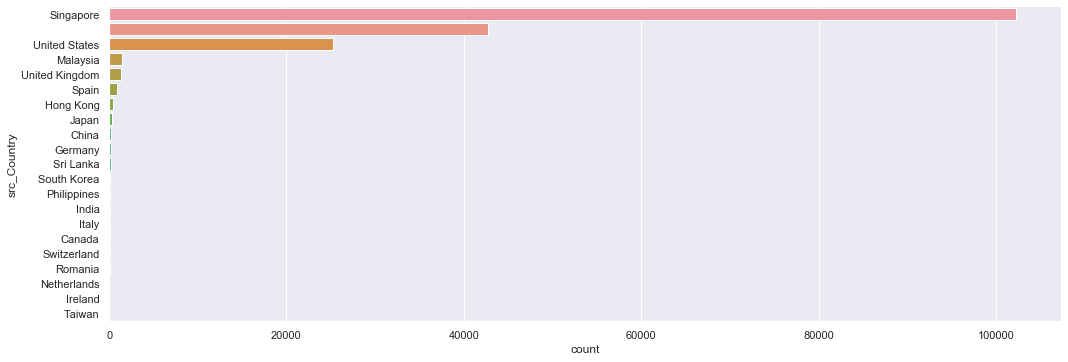

In [48]:
sb.catplot(y = 'src_Country', data = sFlowData, kind = "count", aspect = 3, order = sFlowData['src_Country'].value_counts().index)


In [41]:
sFlowData['dest_Country'].value_counts("")

Singapore         91782
                  59137
United States      9828
Malaysia           6744
China              2735
Sri Lanka          2353
India              1121
Hong Kong           653
United Kingdom      574
Spain               398
South Korea         199
Japan               141
Philippines          98
Canada               70
Germany              69
Switzerland          55
Italy                33
Netherlands          10
Taiwan                9
Ireland               8
Name: dest_Country, dtype: int64

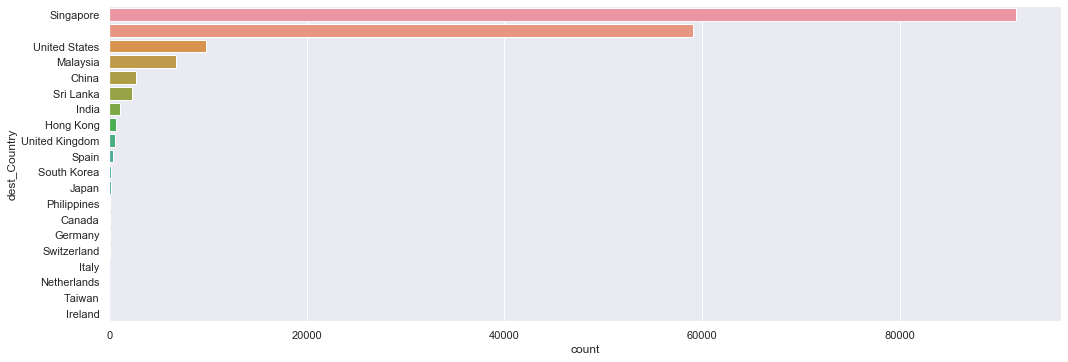

In [49]:
sb.catplot(y = 'dest_Country', data = sFlowData, kind = "count", aspect = 3, order = sFlowData['dest_Country'].value_counts().index)


Based on the limited data, I can create heat maps using Tableau to show no. of packets sent and received by Country.

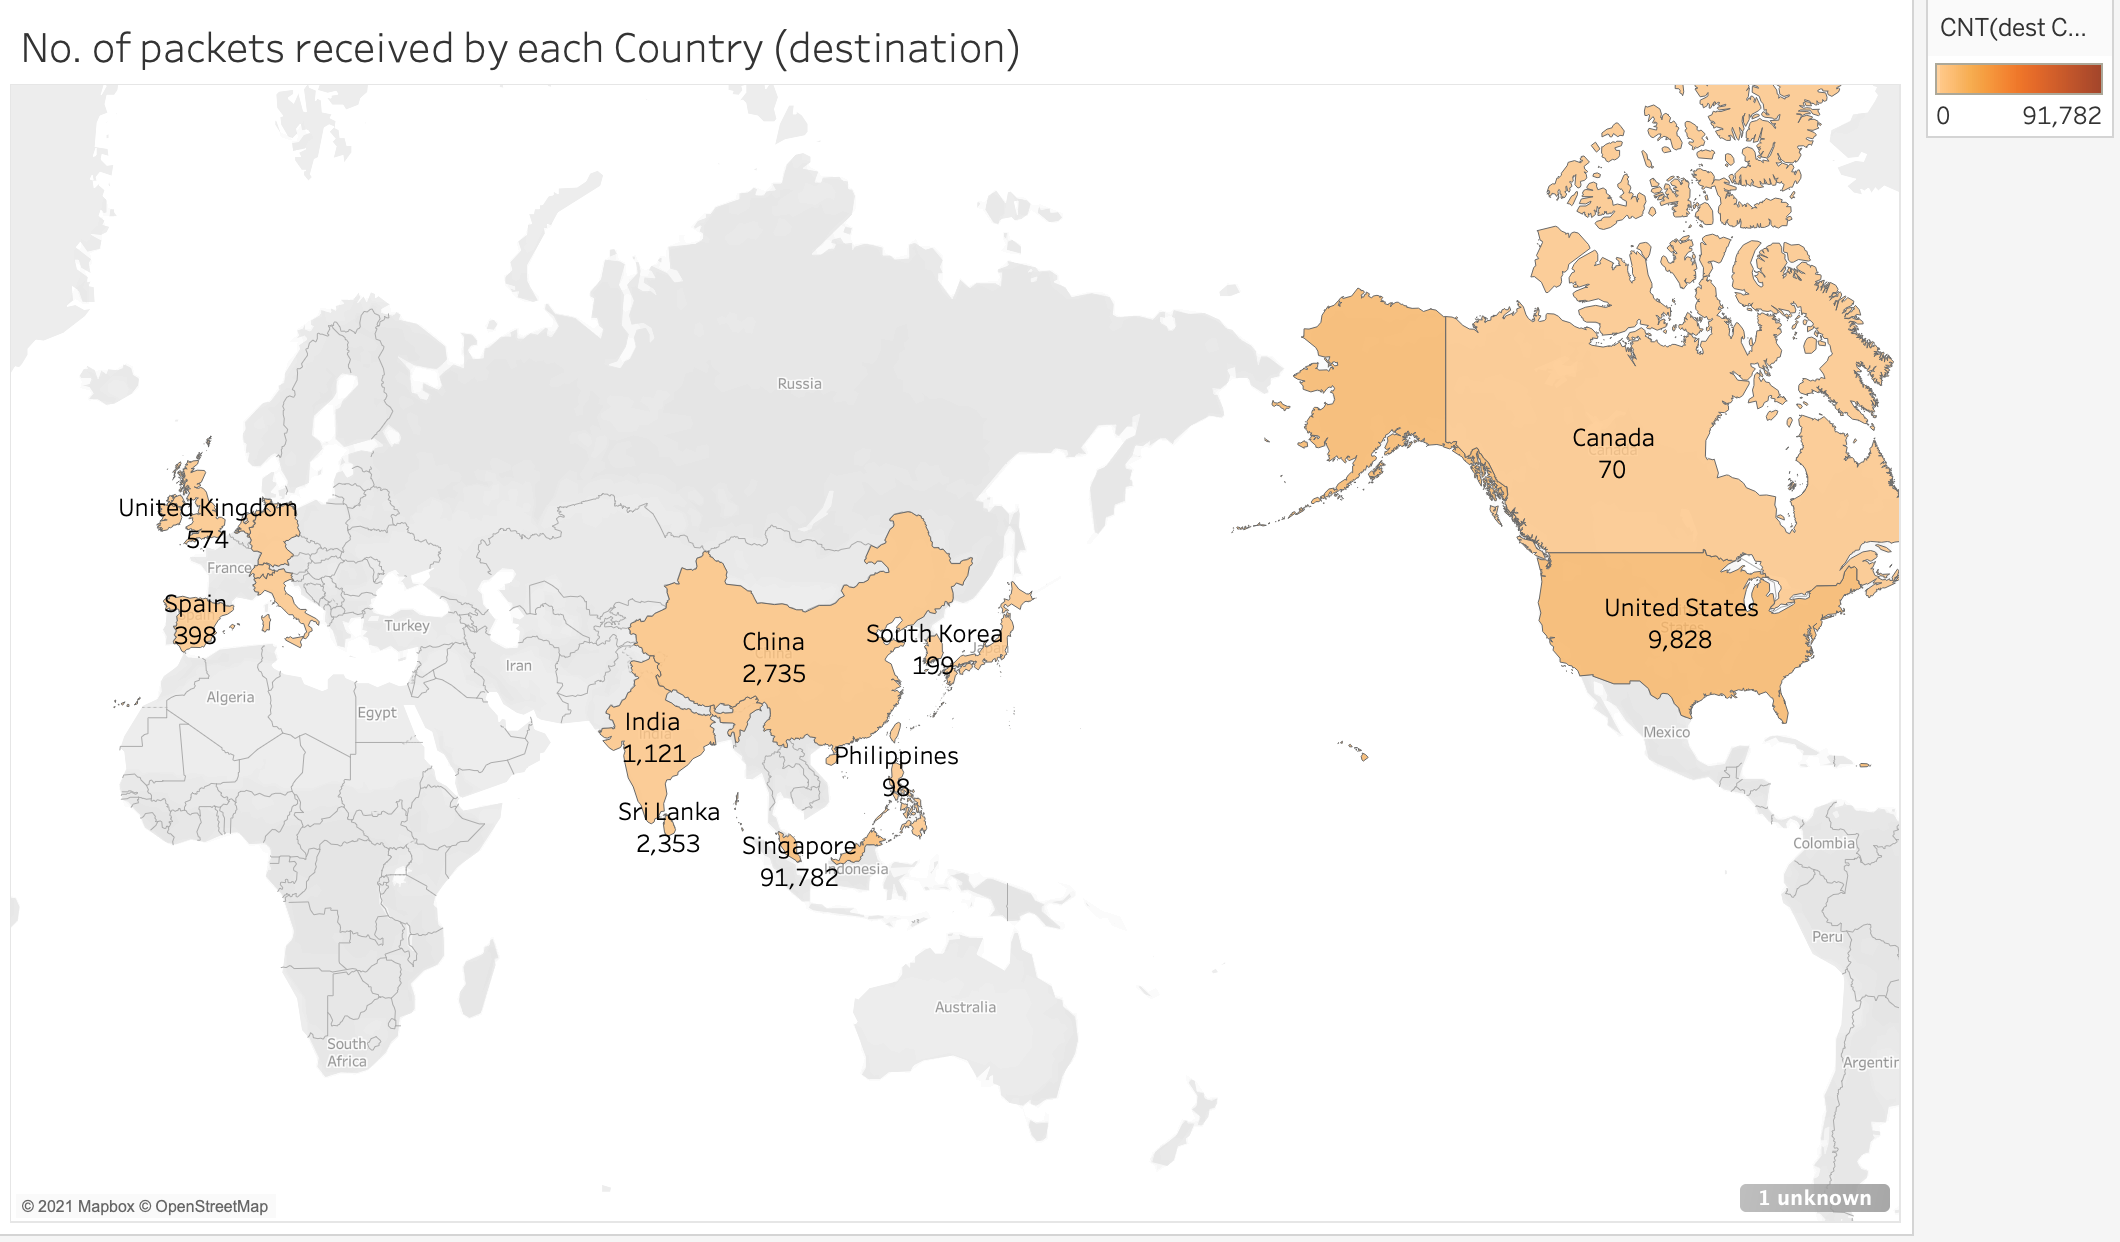

In [44]:
from IPython.display import Image
Image(filename='dest_map.png') 

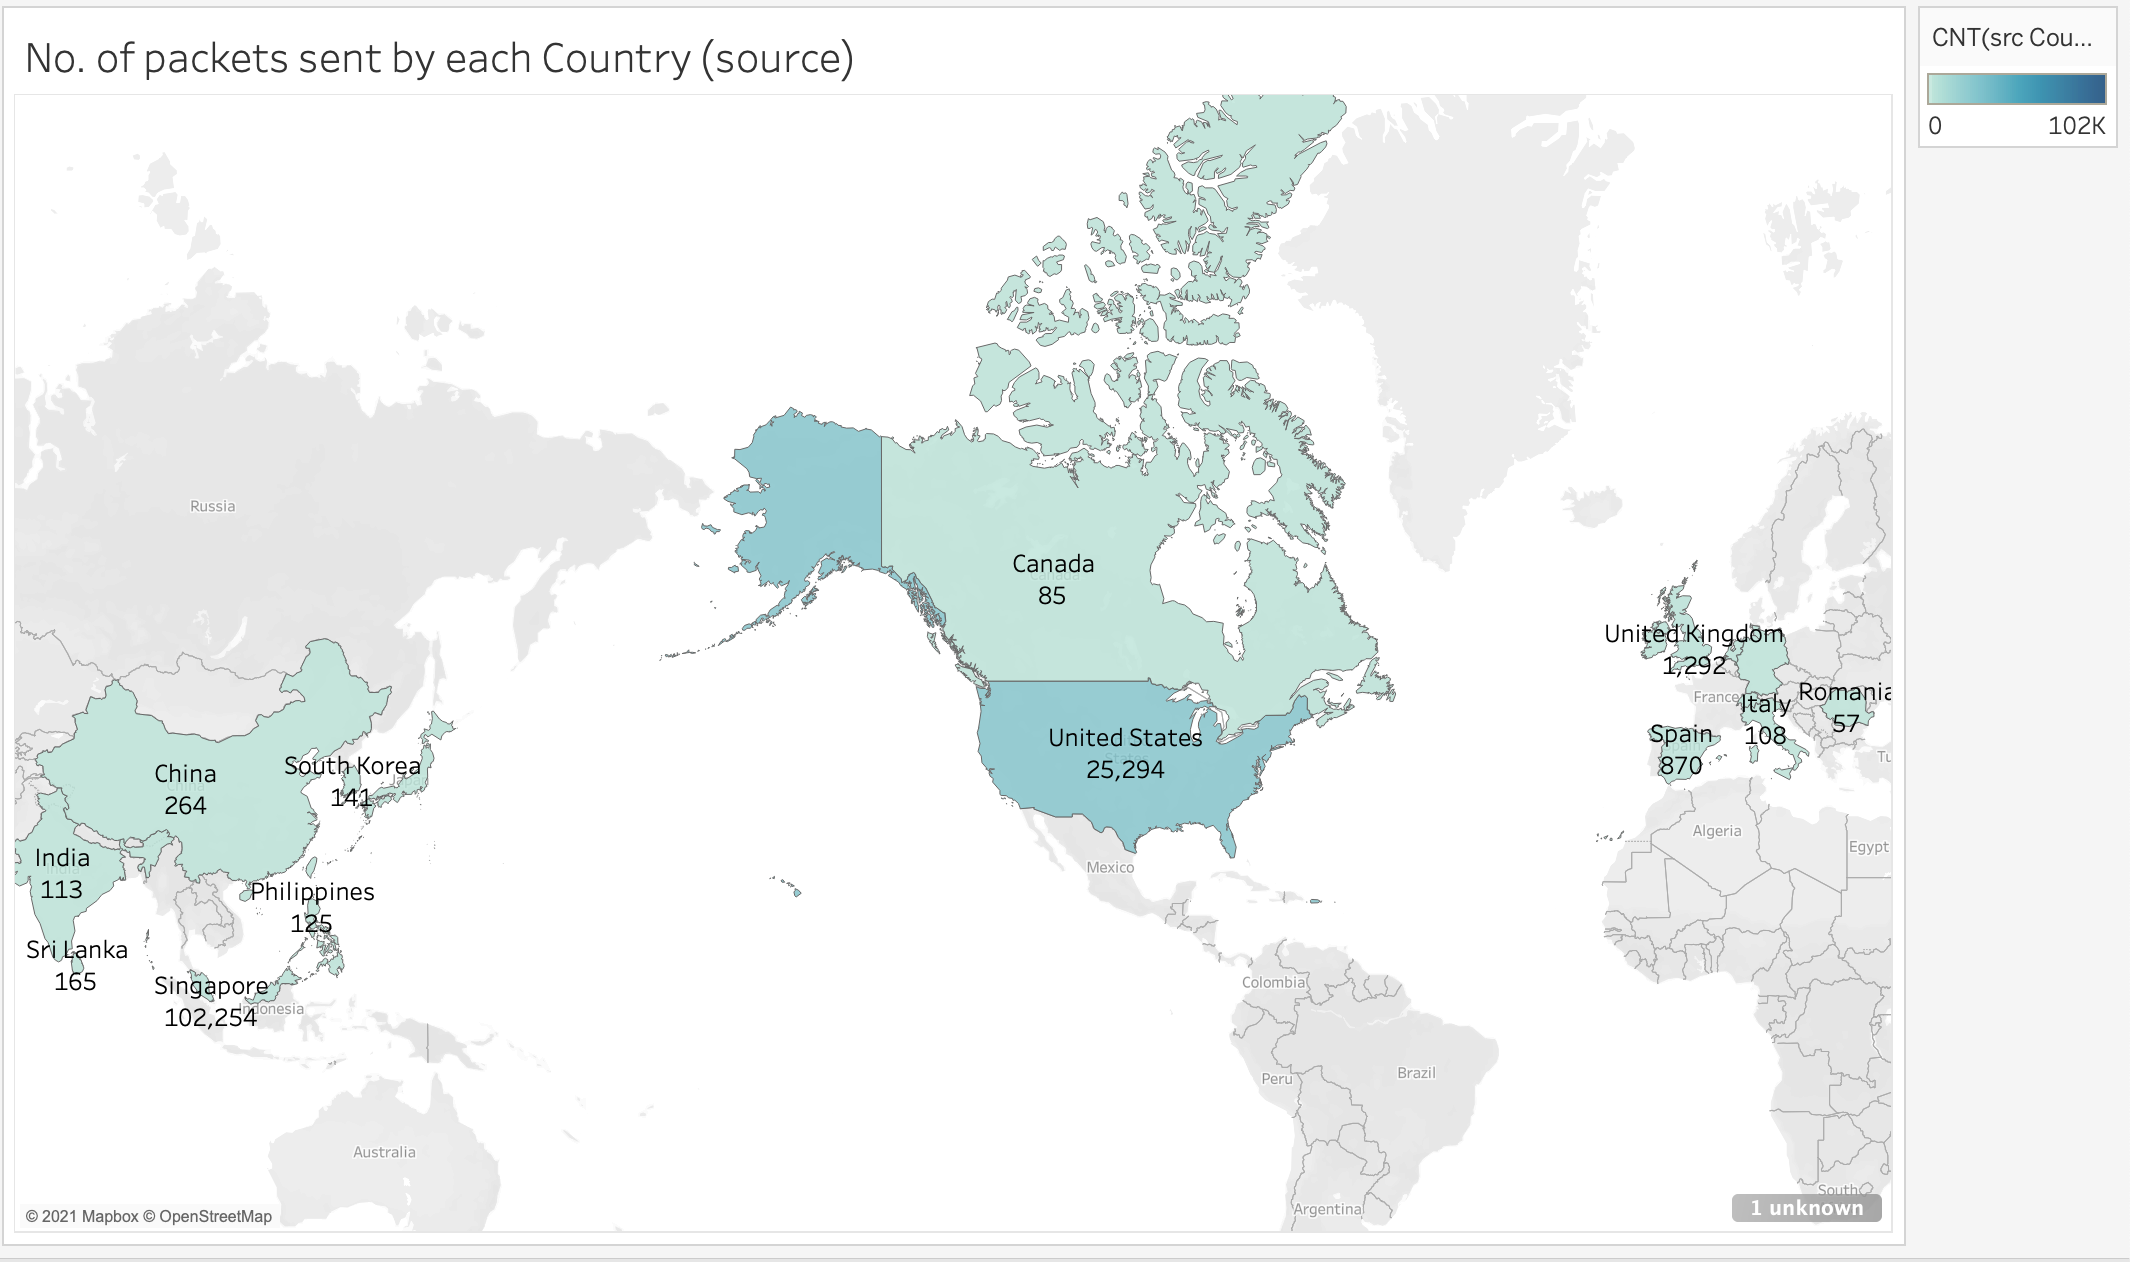

In [45]:
from IPython.display import Image
Image(filename='src_map.png') 

In [26]:
grouped_dataframe = sFlowData.groupby(['src_IP', 'dest_IP']).size().sort_values(ascending=False).to_frame('packets_sent').reset_index()
grouped_dataframe.head()

src_IP         dest_IP  packets_sent
0    130.14.250.7  103.37.198.100          3739
1    171.67.77.19  192.122.131.36          2656
2   129.99.230.54   137.132.22.74          2097
3  137.132.228.42  137.131.17.212          1553
4  155.69.252.133   138.75.242.36          1475

In [14]:
import igraph
import cairo

Creating graph for visualisation of top 4% of records for packets sent

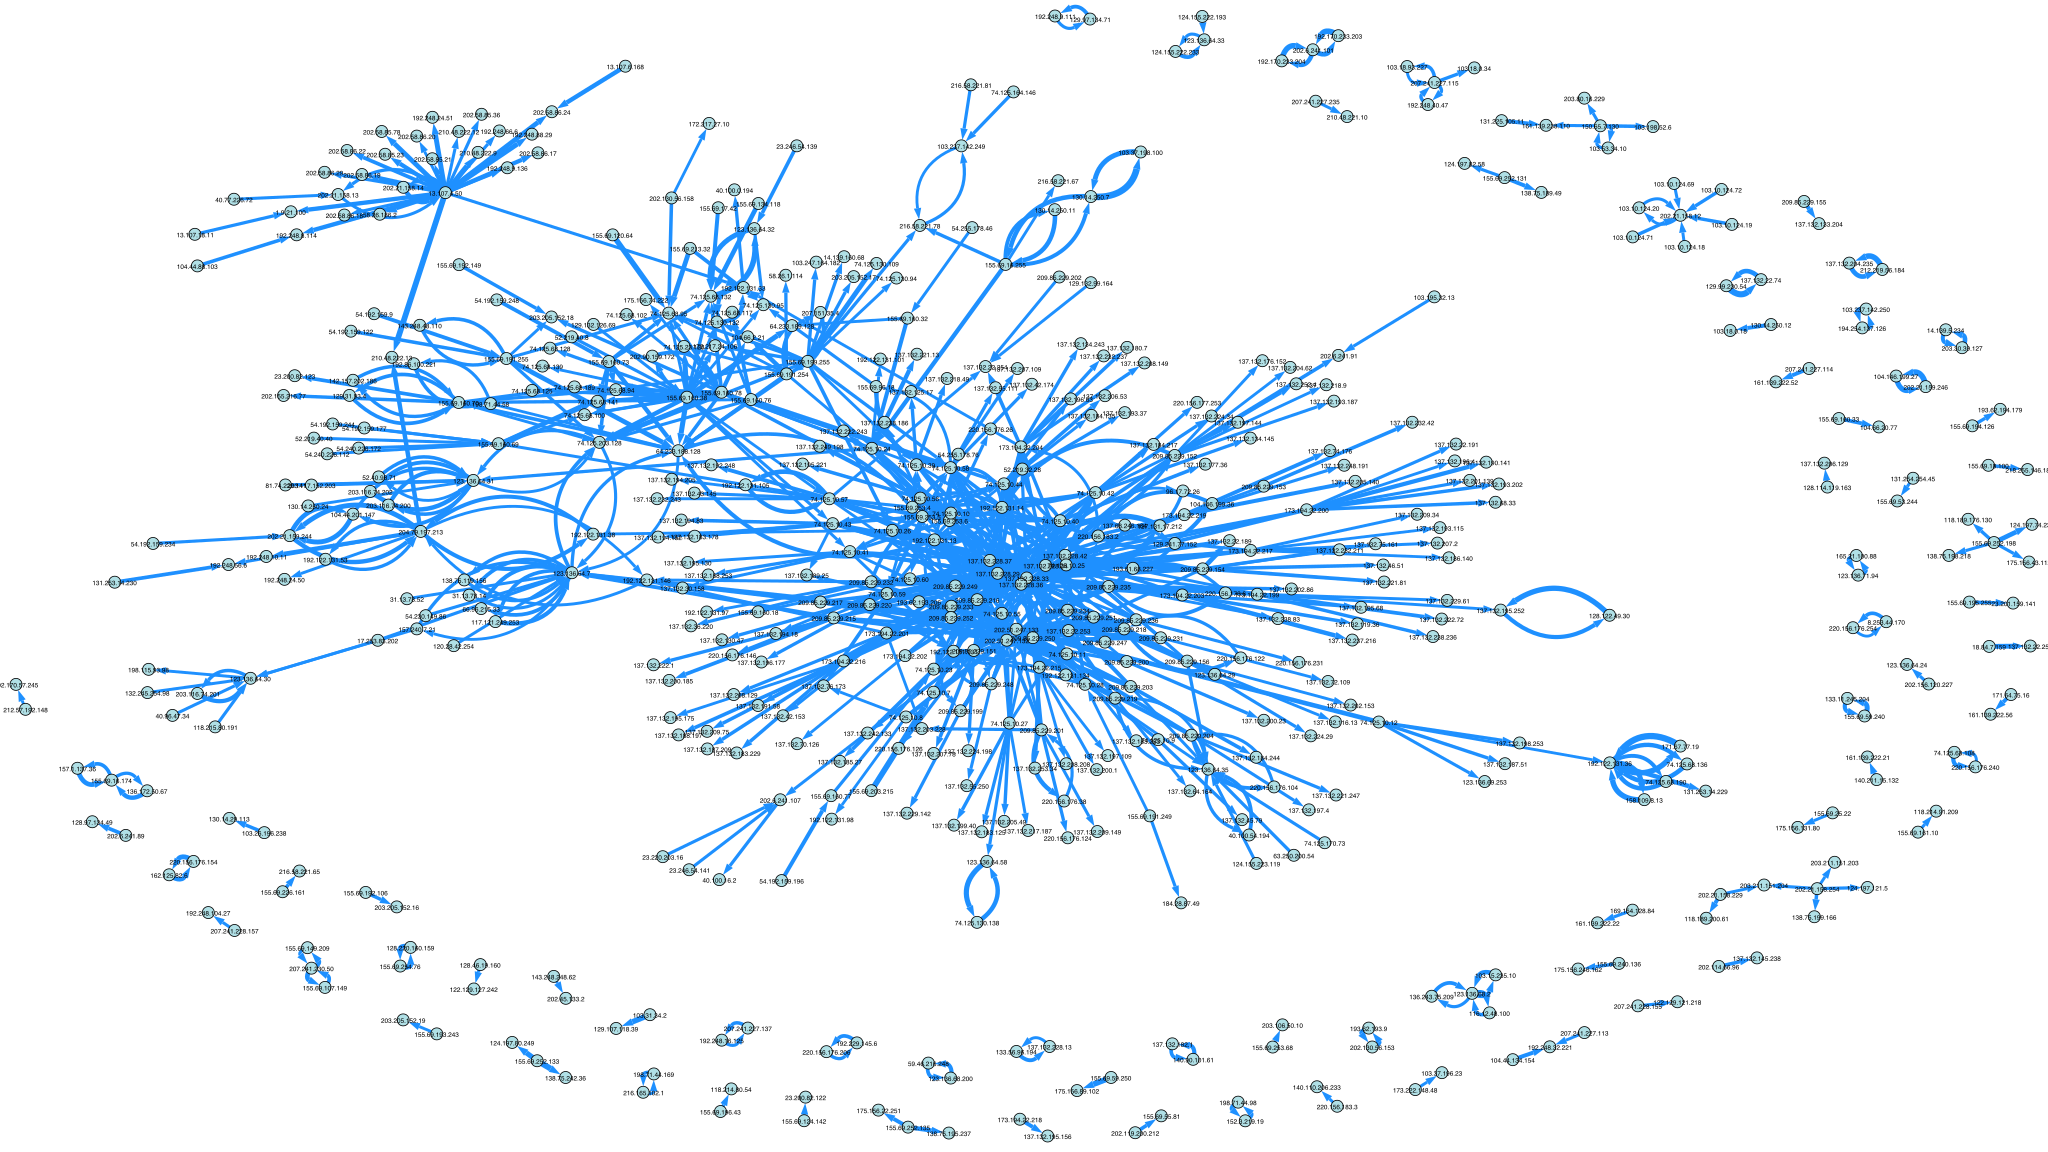

In [31]:
tuple_list = [tuple(row)for row in grouped_dataframe.head(n=(len(grouped_dataframe)//25)).to_numpy()]

# construct the graph (or network)
computer_network = igraph.Graph.TupleList(
    tuple_list, 
    directed=True, 
    weights=True, 
)

# set vertice attributes
computer_network.vs['size'] = 15
computer_network.vs['label_size'] = 8
computer_network.vs['label'] = computer_network.vs['name']
computer_network.vs['color'] = 'powderblue'

import math

# set edge attributes
computer_network.es['width'] =  [
    max(math.log(weight), 0.1)
    for weight in computer_network.es['weight']
]
computer_network.es['arrow_size'] = 1

computer_network.es['color'] = 'dodgerblue'


# plot graph
layout = computer_network.layout('fr')
igraph.plot(computer_network, layout=layout, bbox=(2560, 1440))
igraph.plot(computer_network, 'computer_network.png', layout=layout, bbox=(2560, 1440))

Creating graph for visualisation of top 1% of records for packets sent

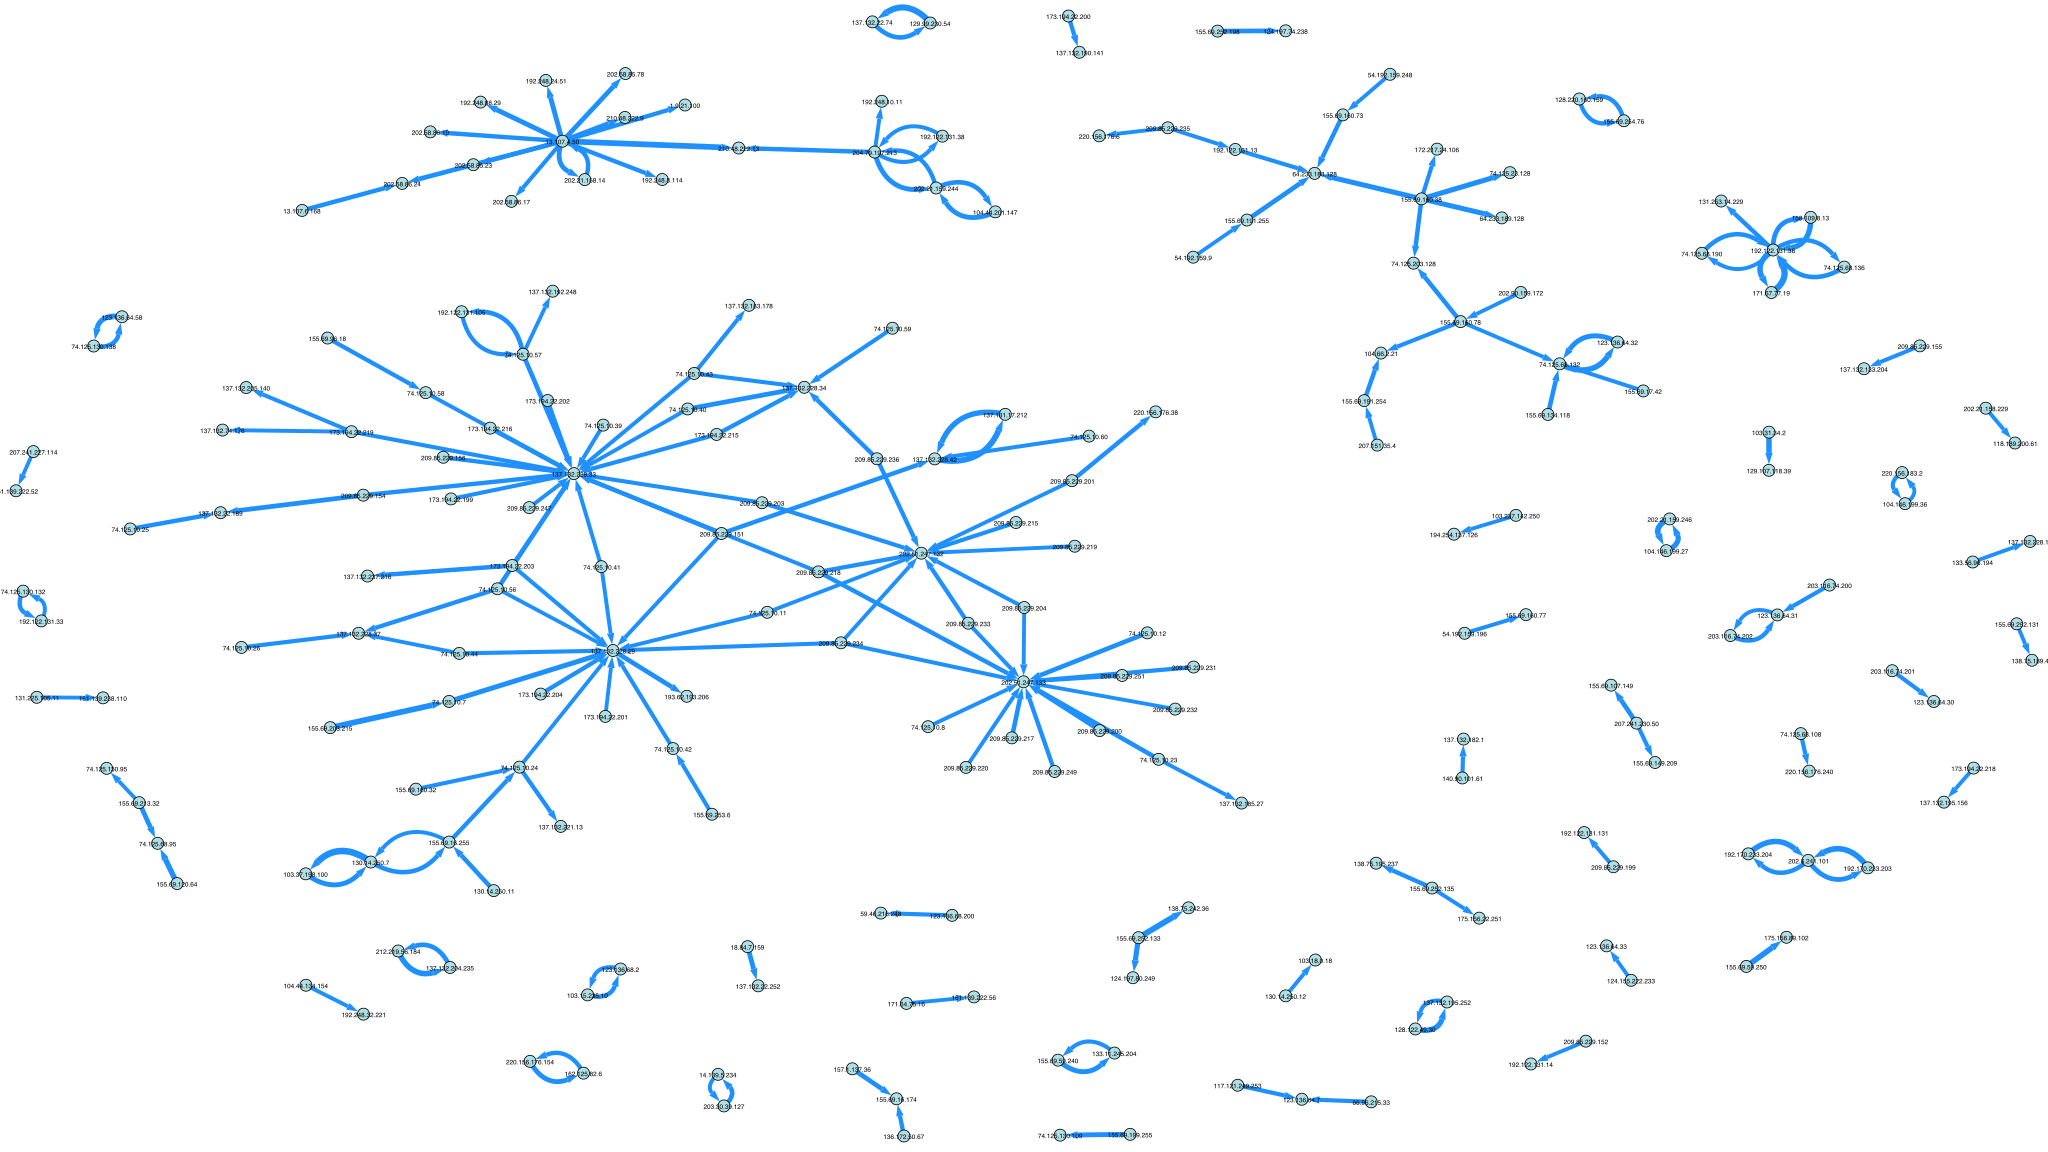

In [34]:
tuple_list = [tuple(row)for row in grouped_dataframe.head(n=(len(grouped_dataframe)//100)).to_numpy()]

# construct the graph (or network)
computer_network = igraph.Graph.TupleList(
    tuple_list, 
    directed=True, 
    weights=True, 
)

# set vertice attributes
computer_network.vs['size'] = 15
computer_network.vs['label_size'] = 8
computer_network.vs['label'] = computer_network.vs['name']
computer_network.vs['color'] = 'powderblue'

import math

# set edge attributes
computer_network.es['width'] =  [
    max(math.log(weight), 0.1)
    for weight in computer_network.es['weight']
]
# computer_network.es['arrow_size'] = 1

computer_network.es['color'] = 'dodgerblue'


# plot graph
layout = computer_network.layout('fr')
igraph.plot(computer_network, layout=layout, bbox=(2560, 1440))
igraph.plot(computer_network, 'computer_network_2.png', layout=layout, bbox=(2560, 1440))


From the graph above, we can see that relatively many packets from various IP addresses are sent to addresses 137.132.228.33, 137.132.228.29, 202.51.247.133, 202.51.247.132  

we can also see that 13.107.4.50 sends quite a few packets to different addresses

Port scanning: using the grouped dataframe ordered by top unidirectional communication pairs, check to see if there are many ports the packets are sent to, or only a few ports. Port scanning may indicate a hacker is looking for open ports to send packets to

In [38]:
grouped_dataframe = sFlowData.groupby(['src_IP', 'dest_IP']).size().sort_values(ascending=False).to_frame('packets_sent').reset_index()
grouped_dataframe.head()

src_IP         dest_IP  packets_sent
0    130.14.250.7  103.37.198.100          3739
1    171.67.77.19  192.122.131.36          2656
2   129.99.230.54   137.132.22.74          2097
3  137.132.228.42  137.131.17.212          1553
4  155.69.252.133   138.75.242.36          1475

In [61]:
grouped_dataframe.loc[:1000].tail()

src_IP          dest_IP  packets_sent
996    155.69.160.38    74.125.68.113            29
997   192.122.131.13   209.85.229.252            29
998   192.122.131.13   74.125.203.128            29
999   163.180.145.62  122.129.122.187            29
1000   216.58.221.65  103.237.142.249            29

we can use 30 as a benchmark for how many ports scanned is considered as port scanning

In [63]:
df_dict = grouped_dataframe.loc[:1000].to_dict('records')
sf_dict= sFlowData.to_dict('records')
port_scans = {'src_IP':[], 'dest_IP':[], 'no_of_ports_scanned':[], 'ports_scanned':[]}
for row in df_dict:
    ports_scanned = []

    for Row in sf_dict:
        if Row['src_IP'] == row['src_IP'] and Row['dest_IP'] == row['dest_IP'] and Row['dest_port'] not in ports_scanned:
            ports_scanned.append(Row['dest_port'])
    
    if len(ports_scanned) > 8:
        port_scans['src_IP'].append(row['src_IP'])
        port_scans['dest_IP'].append(row['dest_IP'])
        port_scans['no_of_ports_scanned'].append(len(ports_scanned))
        port_scans['ports_scanned'].append(ports_scanned)

ps = pd.DataFrame(port_scans)
ps.head()
        
#         print('no. of ports of ', row['dest_IP'],', scanned by ',row['src_IP'],":", len(ports_scanned))
#         print('ports scanned: ', ports_scanned)

src_IP         dest_IP  no_of_ports_scanned  \
0   155.69.252.133   138.75.242.36                   10   
1      13.107.4.50   210.48.222.13                  552   
2  192.170.233.203   202.6.241.101                   40   
3  192.170.233.204   202.6.241.101                   32   
4   137.131.17.212  137.132.228.42                   30   

                                       ports_scanned  
0  [52510, 52517, 52518, 52520, 52522, 52523, 525...  
1  [50593, 60755, 55656, 50933, 55961, 60757, 539...  
2  [35125, 47587, 34612, 53313, 43472, 45564, 572...  
3  [44194, 50523, 60928, 57208, 40724, 33774, 404...  
4  [25736, 57700, 62833, 36413, 50802, 3610, 6284...

In [66]:
ps.sort_values(by='no_of_ports_scanned', ascending=False).head(20)

src_IP          dest_IP  no_of_ports_scanned  \
1        13.107.4.50    210.48.222.13                  552   
6        13.107.4.50     210.48.222.9                  218   
15      74.125.10.57  192.122.131.105                  208   
13       13.107.4.50     202.58.86.24                  179   
12       13.107.4.50     202.58.85.78                  165   
11       13.107.4.50    202.21.158.14                  128   
7        13.107.4.50    192.248.88.29                  108   
46    209.85.229.199  192.122.131.131                   97   
8        13.107.4.50    192.248.24.51                   93   
35       13.107.4.50     202.58.85.23                   83   
65      74.125.10.23   137.132.185.27                   80   
91    192.86.100.221     198.71.44.58                   76   
28       13.107.4.50    192.248.8.114                   63   
90     23.246.54.139    123.136.64.32                   59   
120     152.3.219.19     198.71.44.98                   57   
80    209.85.229.152   137.132.228.33                   56   
95   194.254.137.126  103.237.142.250                   54   
5     104.146.199.27   202.21.159.246                   53   
22       13.107.4.50     202.58.86.19                   53   
121   209.85.229.151    220.156.183.2                   49   

                                         ports_scanned  
1    [50593, 60755, 55656, 50933, 55961, 60757, 539...  
6    [58602, 58597, 58621, 58632, 58633, 58623, 586...  
15   [1408, 2085, 2017, 1445, 2630, 1240, 1054, 429...  
13   [37839, 7698, 43662, 53819, 31506, 29772, 2774...  
12   [58559, 42848, 12061, 58198, 27936, 46659, 232...  
11   [56299, 57085, 57094, 57115, 57189, 57095, 570...  
7    [29317, 6606, 6836, 6447, 18760, 21099, 13871,...  
46   [56491, 3982, 56493, 56495, 56499, 56501, 5650...  
8    [19250, 19265, 19259, 49242, 19277, 20455, 192...  
35   [13173, 10516, 32589, 64563, 65470, 44066, 194...  
65   [57214, 57217, 57229, 57233, 57247, 57253, 572...  
91   [60870, 11160, 47587, 64106, 41170, 49764, 263...  
28   [56678, 56558, 56718, 56550, 36530, 49590, 551...  
90   [4643, 50228, 38178, 17633, 31802, 54503, 2011...  
120  [57155, 52462, 0, 15000, 46134, 34606, 44416, ...  
80   [63265, 54771, 45947, 39690, 51500, 55161, 503...  
95   [32950, 0, 29629, 23705, 38687, 55686, 8025, 1...  
5    [17590, 27069, 17195, 3515, 19877, 4637, 28609...  
22   [52505, 61806, 4357, 46995, 24173, 12349, 4543...  
121  [52502, 52891, 52905, 53262, 53445, 53613, 536...

In [72]:
all_ephemeral = True
for port in ps['ports_scanned'].iloc[1]:
    if int(port) < 49152:
        all_ephemeral = False
        print(port)

if all_ephemeral:
    print('all_ephemeral')
else:
    print('not_all_ephemeral')



36468
46368
48826
38274
not_all_ephemeral


##### Interestingly, a whopping 552 different ports from 210.48.222.13 (International Islamic University Of Malaysia), most of which I believe are ephemeral/dynamic ports, were scanned by  13.107.4.50 (Microsoft).


218 different ports from 210.48.222.9, also registered under International Islamic University Of Malaysia, were scanned by  13.107.4.50 (Microsoft).



74.125.10.57 (Google) had performed port scanning on 208 different ports of 192.122.131.105	(ASTAR)

202.58.86.24	Universiti Teknologi MARA in Malaysia
202.58.85.78	Universiti Teknologi MARA
202.21.158.14   Republic Polytechnic
192.248.88.29   Lanka Education and Research Network
209.85.229.199  Google
192.122.131.131 A*STAR

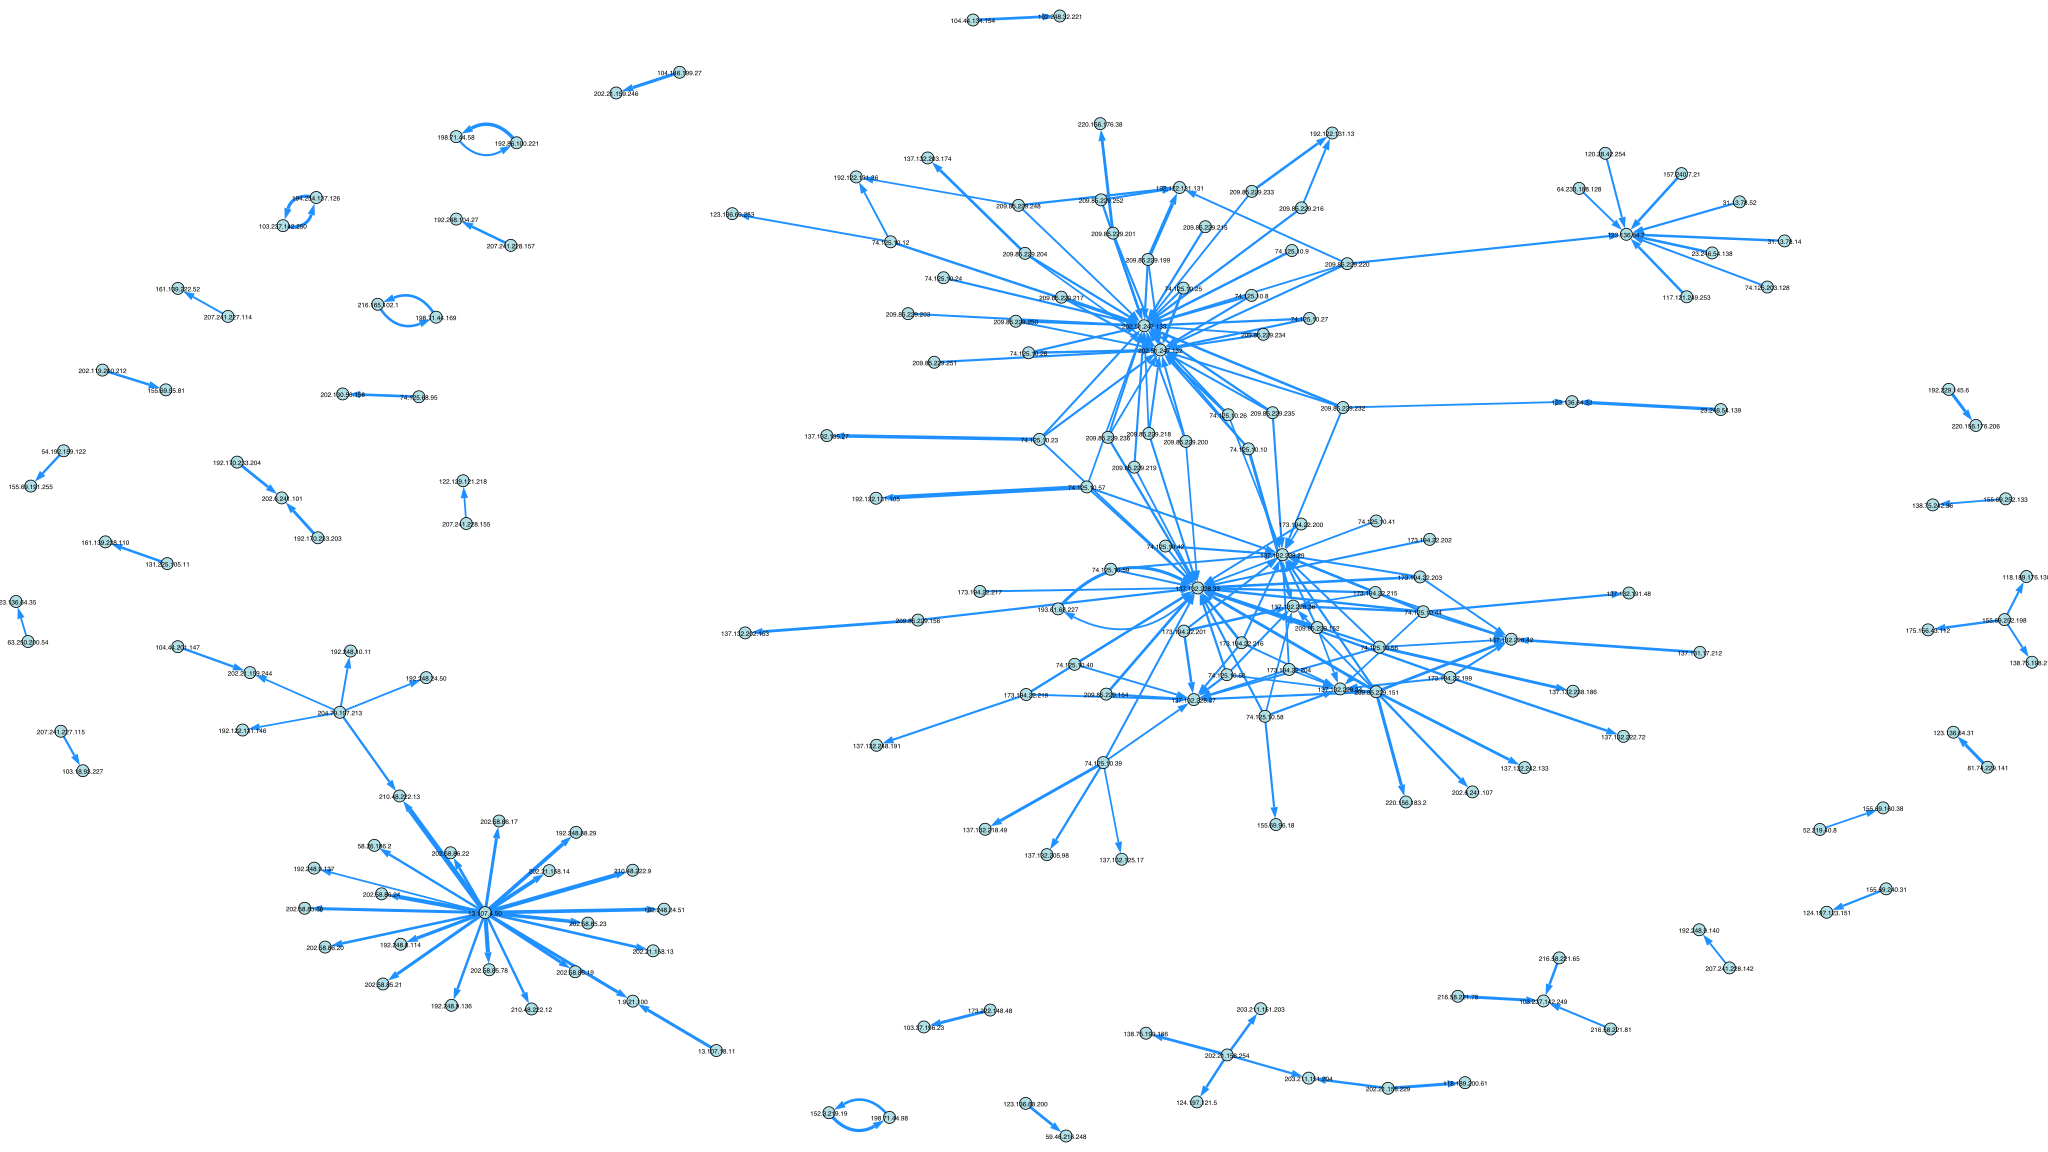

In [74]:
tuple_list = [tuple(row)for row in ps.to_numpy()]

# construct the graph (or network)
computer_network = igraph.Graph.TupleList(
    tuple_list, 
    directed=True, 
    weights=True, 
)

# set vertice attributes
computer_network.vs['size'] = 15
computer_network.vs['label_size'] = 8
computer_network.vs['label'] = computer_network.vs['name']
computer_network.vs['color'] = 'powderblue'

import math

# set edge attributes
computer_network.es['width'] =  [
    max(math.log(weight), 0.1)
    for weight in computer_network.es['weight']
]
# computer_network.es['arrow_size'] = 1

computer_network.es['color'] = 'dodgerblue'


# plot graph
layout = computer_network.layout('fr')
igraph.plot(computer_network, layout=layout, bbox=(2560, 1440))
igraph.plot(computer_network, 'port_scans.png', layout=layout, bbox=(2560, 1440))
